In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot



In [2]:
data = pd.read_csv("Data/marketing_campaign.csv", sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
print(data.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
total = data.isnull().sum().sort_values(ascending=False)
perc = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)

missing = pd.concat([total, perc], axis=1, keys = ['Total', 'Percentage'])
print(missing)

                     Total  Percentage
Income                  24    1.071429
ID                       0    0.000000
NumDealsPurchases        0    0.000000
Z_Revenue                0    0.000000
Z_CostContact            0    0.000000
Complain                 0    0.000000
AcceptedCmp2             0    0.000000
AcceptedCmp1             0    0.000000
AcceptedCmp5             0    0.000000
AcceptedCmp4             0    0.000000
AcceptedCmp3             0    0.000000
NumWebVisitsMonth        0    0.000000
NumStorePurchases        0    0.000000
NumCatalogPurchases      0    0.000000
NumWebPurchases          0    0.000000
MntGoldProds             0    0.000000
Year_Birth               0    0.000000
MntSweetProducts         0    0.000000
MntFishProducts          0    0.000000
MntMeatProducts          0    0.000000
MntFruits                0    0.000000
MntWines                 0    0.000000
Recency                  0    0.000000
Dt_Customer              0    0.000000
Teenhome                 

In [6]:
data['Income'] = data['Income'].fillna(data['Income'].median())

In [7]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [8]:
data = data.drop(columns=["Z_CostContact", "Z_Revenue"])

In [9]:
df = data.copy()

In [10]:
import seaborn as sns


## Education

In [11]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [12]:
df['Education'] = df['Education'].replace('Basic', 'Undergraduate')
df['Education'] = df['Education'].replace(['Graduation', 'PhD', 'Master', '2n Cycle'], 'Post Graduation')


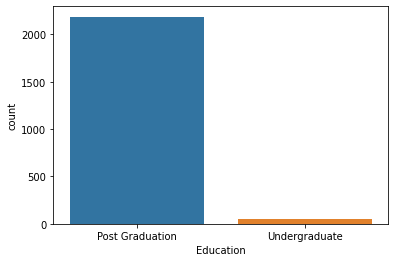

In [13]:
plt = sns.countplot(x = 'Education', data = df)

In [14]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [15]:
df['Marital_Status'] = df['Marital_Status'].replace(['Together', 'Married'], 'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 'Single')

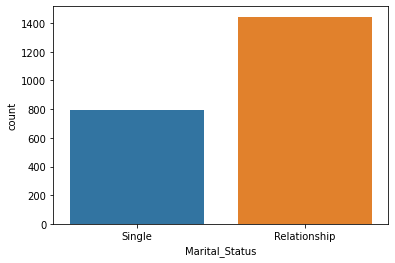

In [16]:
plt = sns.countplot(x = 'Marital_Status', data = df)

In [17]:
print("Max Income: ", df['Income'].max())
print("Min Income: ", df['Income'].min())
print("Mean Income: ", df['Income'].mean())

Max Income:  666666.0
Min Income:  1730.0
Mean Income:  52237.97544642857


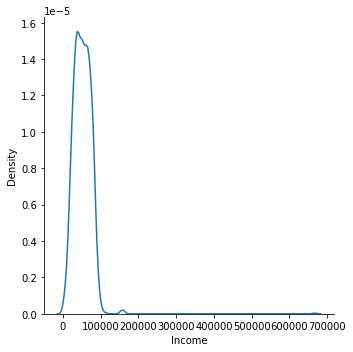

In [18]:
plt = sns.displot(data = df, x = 'Income', kind = 'kde')

In [19]:
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Children'].unique()

array([0, 2, 1, 3], dtype=int64)

Text(0, 0.5, 'Count')

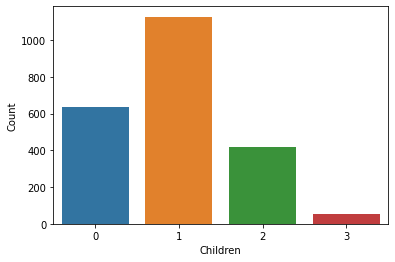

In [20]:
plt = sns.countplot(x = df['Children'], data = df)
plt.set_ylabel('Count')

In [21]:
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [22]:
print("Maximum Expenditure = ", df['Expenses'].max())
print("Minimum Expenditure = ", df['Expenses'].min())
print("Mean Expenditure = ", df['Expenses'].mean())

Maximum Expenditure =  2525
Minimum Expenditure =  5
Mean Expenditure =  605.7982142857143


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


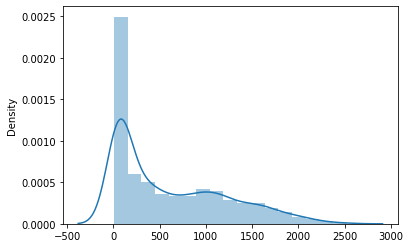

In [23]:
plt = sns.distplot(x = df['Expenses'])

In [24]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['TotalAcceptedCmp'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [25]:
df['Campaign'] = df['TotalAcceptedCmp'].replace([1, 2, 3, 4, 5], 1)


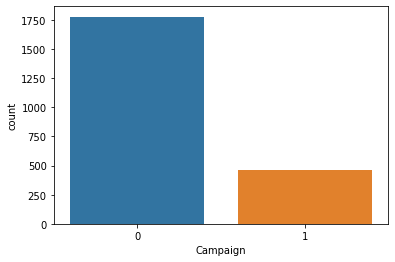

In [26]:
plt = sns.countplot(data = df, x = 'Campaign')

In [27]:
print("Percentage of customers who accepted a campaign: ", sum(df["Campaign"]==1)/len(df))

Percentage of customers who accepted a campaign:  0.20669642857142856


In [28]:

df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44], dtype=int64)

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


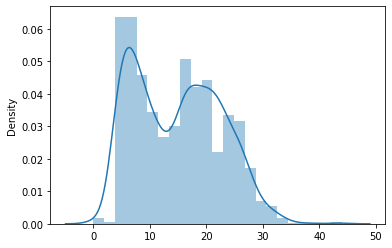

In [29]:
plt = sns.distplot(x = df['NumTotalPurchases'])

In [30]:
col_del = ["ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)

In [31]:
df.columns


Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Dt_Customer',
       'Recency', 'Complain', 'Response', 'Children', 'Expenses',
       'TotalAcceptedCmp', 'Campaign', 'NumTotalPurchases'],
      dtype='object')

In [32]:
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['First_day'] = '01-01-2015'
df['First_day'] = pd.to_datetime(df.First_day)
df['Day_engaged'] = (df['First_day'] - df['Dt_Customer']).dt.days

In [33]:
df['Age'] = (pd.Timestamp('now').year) - (pd.to_datetime(df['Dt_Customer']).dt.year)

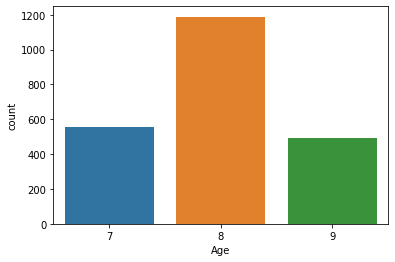

In [34]:
plt = sns.countplot(x = df['Age'])

In [35]:
df=df.drop(columns=["Dt_Customer", "First_day", "Year_Birth", "Dt_Customer", "Recency", "Complain","Response"],axis=1)

In [36]:
order = [0,1,3,4,6,7,8,2,5]
df = df[[df.columns[i] for i in order]]

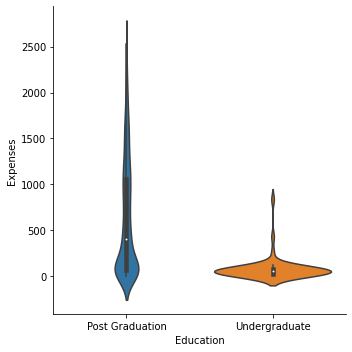

In [37]:
plt = sns.catplot(x = "Education", y = "Expenses", kind = "violin", data = df)

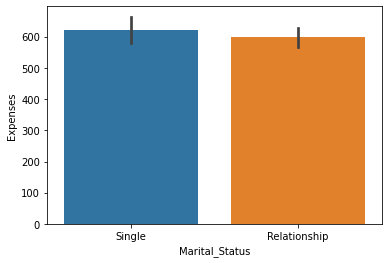

In [38]:
plt = sns.barplot(x = "Marital_Status", y = "Expenses", data = df)

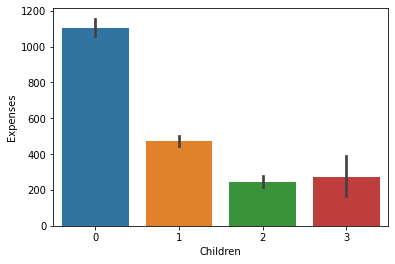

In [39]:
plt = sns.barplot(x = "Children", y = "Expenses", data = df)

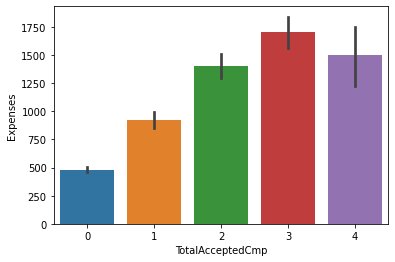

In [40]:
plt = sns.barplot(x = 'TotalAcceptedCmp', y = 'Expenses', data=df)

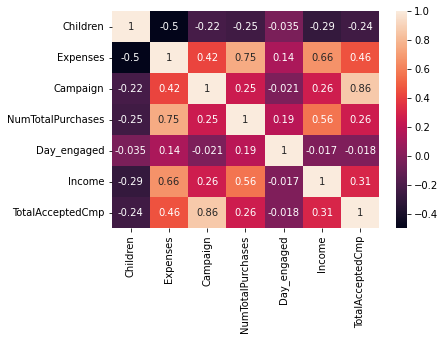

In [42]:
plt = sns.heatmap(df.corr(), annot=True)

In [43]:
cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)

print(" Object are:",cate)

 Object are: ['Education', 'Marital_Status']


In [44]:
from sklearn.preprocessing import LabelEncoder
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [45]:
df1 = df.copy()

In [46]:


from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df1.values)
sf_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [47]:
sf_df.head()

,Education,Marital_Status,Children,Expenses,Campaign,NumTotalPurchases,Day_engaged,Income,TotalAcceptedCmp
0,-0.157171,1.346874,-1.264505,1.679417,-0.510442,1.320826,1.976745,0.235696,-0.439037
1,-0.157171,1.346874,1.396361,-0.961275,-0.510442,-1.154596,-1.667011,-0.235454,-0.439037
2,-0.157171,-0.742460,-1.264505,0.282673,-0.510442,0.799685,-0.172468,0.773999,-0.439037
3,-0.157171,-0.742460,0.065928,-0.918094,-0.510442,-0.894025,-1.925433,-1.022355,-0.439037
4,-0.157171,-0.742460,0.065928,-0.305254,-0.510442,0.539114,-0.822831,0.241888,-0.439037


In [48]:
X = sf_df.iloc[:, [7, 3]].values
print(X)

[[ 0.23569584  1.67941681]
 [-0.23545419 -0.96127545]
 [ 0.77399892  0.28267329]
 ...
 [ 0.18947568  1.05495122]
 [ 0.67940139  0.39394775]
 [ 0.02520835 -0.7204576 ]]


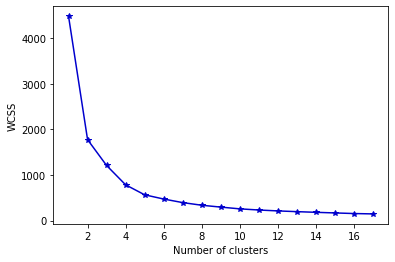

In [53]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 18):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plot.plot(range(1, 18), wcss,color = "mediumblue",marker = '*')
plot.xlabel('Number of clusters')
plot.ylabel('WCSS')
plot.show()

In [54]:
kmeans = KMeans(n_clusters =2 , init = 'k-means++', random_state = 50)
y_kmeans = kmeans.fit_predict(X)

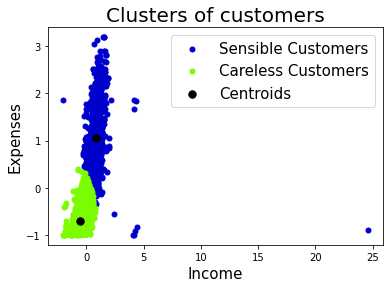

In [57]:
plot.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 25, c = 'mediumblue', label = 'Sensible Customers')
plot.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 25, c = 'lawngreen', label = 'Careless Customers')
plot.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 55, c = 'black', label = 'Centroids')
plot.title('Clusters of customers',fontsize = 20)
plot.xlabel('Income',fontsize = 15)
plot.ylabel('Expenses',fontsize = 15)
plot.legend(fontsize = 15)
plot.show()

# Summary

* The highest Birth rate of customers is 87.
* 97.58% of the customers are "Post graduated"
. * More than half of the customers are in a relationship - 64.46%.
* Minimum Expenses - 5.
* Maximum Expenses - 2525.
* Mean Expenses - 605.7982.
* 79.33% of the customers who accepted the offer in the campaign is 0.
* Minimum NumTotalPurchases - 0.
* Maximum NumTotalPurchases - 44.
* Mean NumTotalPurchases - 14.8620.
* More than half are 8 years old customers.
* Minimum Income - 1730.
* Maximum Income - 666666.
* Mean Income - 52237.9754.
* The highest Expenses rate for Post Graduated Customers is 97.58%.
* The highest Expenses rate for Customers who are in a Relationship is 64.46%.
* The highest Expenses rate for Customers who have one Kid is 50.35%.
* The highest Expenses rate for Customers who accepted the offer in the campaign "0" is 79.33%.
* The highest Expenses rate for 8 years old Customers is 53.08%.